In [1]:
# import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from random import randrange
# import pygraphviz as pgv
%matplotlib inline

Read in relations file

In [2]:
pos_df = pd.read_csv('/homes/fabadmus/Internship/grad_project/pos_file')
neg_df = pd.read_csv('/homes/fabadmus/Internship/grad_project/neg_file')

In [3]:
# full_df = pd.concat([pos_df, neg_df],ignore_index=True)
full_df = pd.read_csv('/homes/fabadmus/Internship/grad_project/labeled_file')
full_df

,Unnamed: 0,subject,object,local_mi,label
0,0,TWDIS_06685,TWMET_00170,1339276,POS
1,1,TWDIS_06685,TWMET_00012,585216,POS
2,2,TWDIS_06685,TWMET_01157,85320,POS
3,4,TWDIS_06685,TWMET_00848,12796,POS
4,6,TWDIS_06685,TWMET_00037,8200,POS
...,...,...,...,...,...
114,243,TWDIS_09015,TWMET_00101,104,NEG
115,244,TWDIS_09015,TWMET_00415,104,NEG
116,245,TWDIS_09015,TWMET_01030,104,NEG
117,246,TWDIS_09015,TWMET_00410,103,NEG


In [4]:
second_layer = pd.read_csv('/homes/fabadmus/Internship/grad_project/second_layer')
second_layer

,Unnamed: 0,subject,object,local_mi
0,0,TWDIS_06685,TWMET_00170,1339276
1,1,TWDIS_06685,TWMET_00012,585216
2,2,TWDIS_06685,TWMET_01157,85320
3,3,TWDIS_06685,TWMET_00848,12796
4,4,TWDIS_06685,TWMET_00037,8200
...,...,...,...,...
784,784,TWMET_01228,TWMET_00188,55755
785,785,TWMET_01229,TWMET_00585,926694
786,786,TWMET_01230,TWMET_01233,5461
787,787,TWMET_01232,TWMET_01233,33626


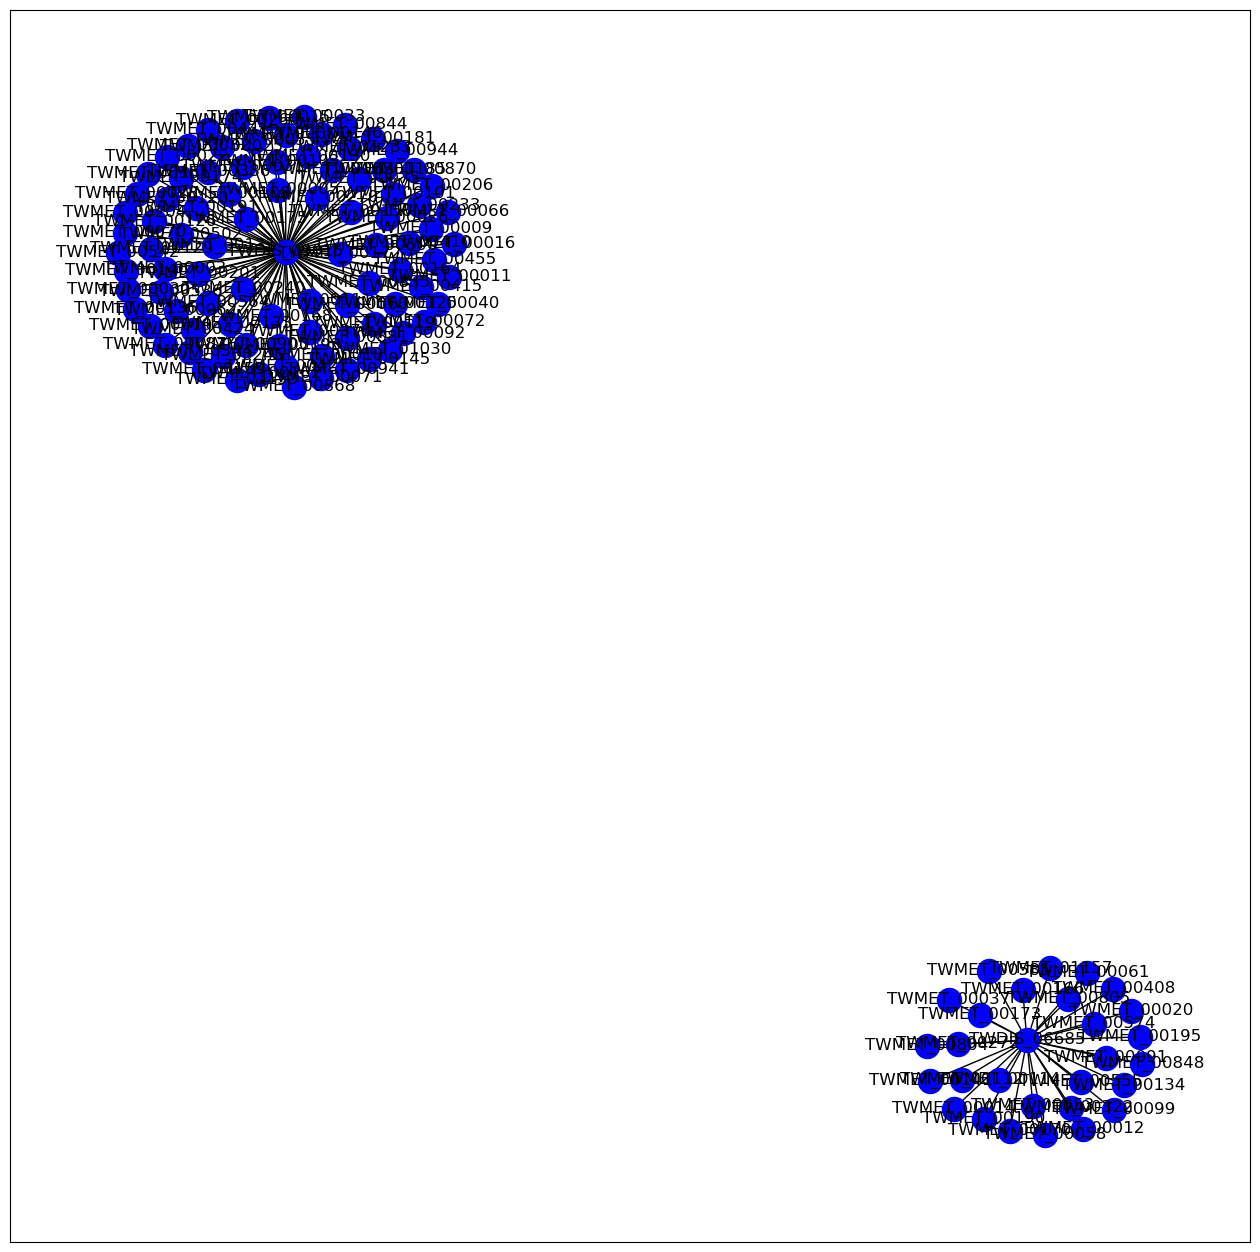

In [5]:
g = nx.from_pandas_edgelist(full_df, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')
plt.figure(5, figsize=(16, 16))
pos =nx.spring_layout(g)
nx.draw_networkx(g, node_color="blue" , pos=pos, with_labels = True)

In [9]:
# convert the second_layer into a graph
second_layer = second_layer[second_layer.subject.str.startswith('TWDIS') == False]
G = nx.from_pandas_edgelist(second_layer, source='subject',
                            target='object', edge_attr='local_mi', edge_key='local_mi')


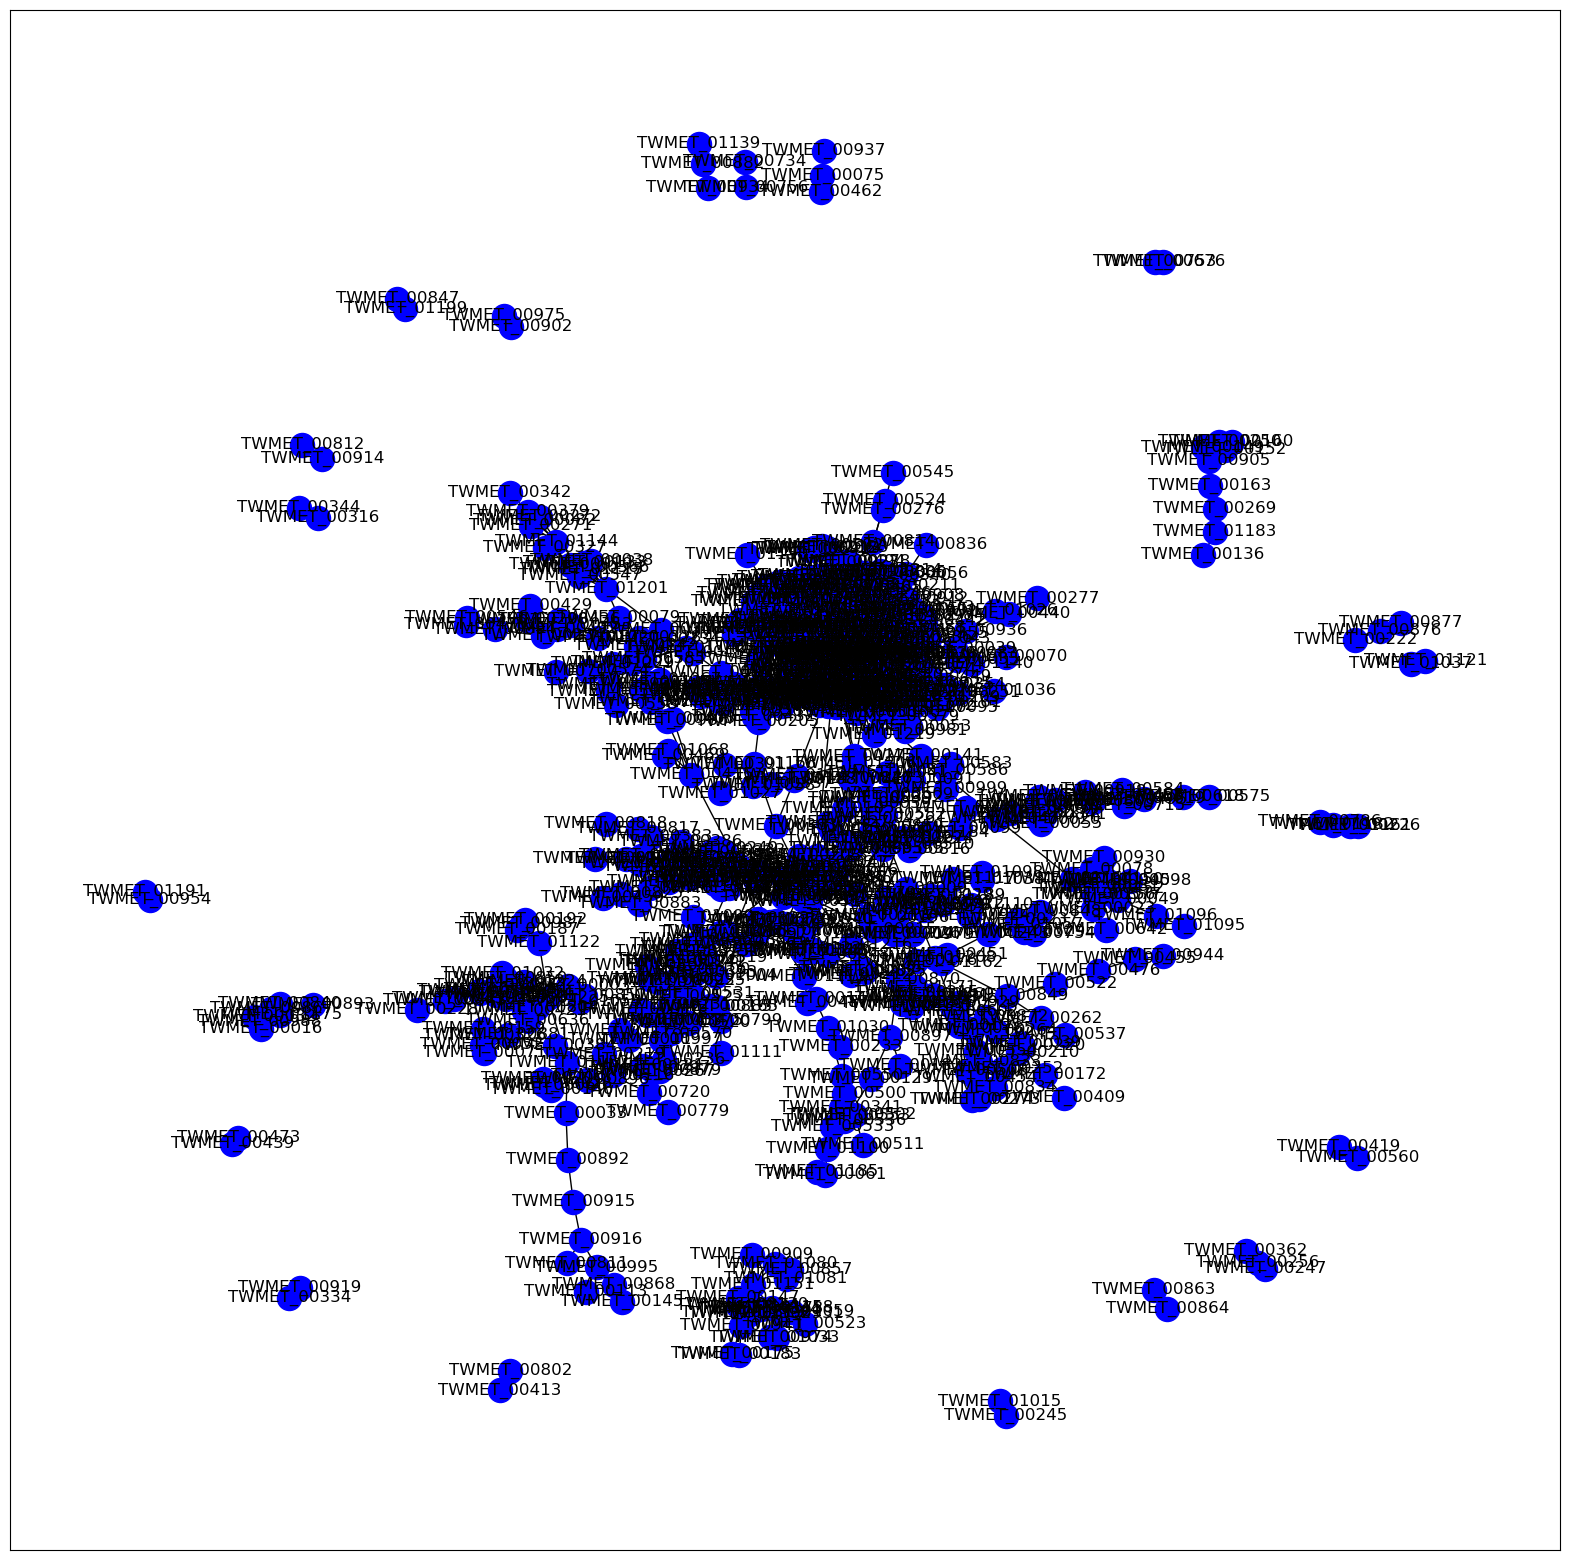

In [10]:
# plot the graph
plt.figure(10, figsize=(20, 20))

pos =nx.spring_layout(G)
nx.draw_networkx(G, node_color="blue" , pos=pos, with_labels = True, )

# nx.draw_networkx_edge_labels(G, 
# edge_labels=nx.get_edge_attributes(G, 'local_mi'),
# font_color="red",
# );
plt.show()

In [12]:
len(G)

687

In [10]:
# nodes = list(G.nodes)

# # nodes.remove([i for i in nodes if i.startswith('TWDIS')])

# sources = [i for i in nodes if i.startswith('TWDIS')]

# for i in sources:
#     nodes.remove(i)

In [11]:
#len(nodes)

687

In [16]:

# load the embeddings of the graph

embeddings = Word2Vec.load('embedding')

# Convert embeddings to dataframe

emb_df = (pd.DataFrame([embeddings.wv.get_vector(str(n))

                        for n in G.nodes()], index=G.nodes))

#emb_df = (pd.DataFrame([embeddings.wv.get_vector]))

emb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_00001,-0.166794,-0.414775,0.862989,0.993104,-0.124340,0.283832,0.331494,-1.788472,-0.073697,1.460505,1.278105,0.003435,-0.688558,-0.001655,-1.121781,-0.568167
TWMET_01233,1.078644,-0.208790,2.685074,1.757169,-1.078023,-0.299977,0.834498,-1.599384,-0.407026,2.403081,1.662401,0.492739,-0.886435,-0.313841,-2.582333,-0.933762
TWMET_00002,0.403398,-0.581190,1.576338,1.409527,-0.101717,-0.053314,0.246773,-2.288491,-0.062283,1.666331,1.607864,-0.324770,-1.182471,0.053857,-1.347394,-0.727040
TWMET_00003,-1.973890,1.003182,2.582344,-2.656549,-0.403502,1.049502,0.925483,0.136950,2.689487,-2.026960,1.912322,0.852008,-2.519128,0.029521,-4.356495,0.691040
TWMET_01224,-2.480243,1.324400,2.489956,-3.228489,-1.116779,1.559646,1.791279,0.321263,3.027741,-2.561118,2.223954,0.771821,-3.053638,-0.450585,-5.694109,1.101901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TWMET_01209,-0.076254,-0.066376,0.219869,0.026127,0.118252,0.058671,0.020004,0.024598,-0.030668,-0.078547,-0.199121,0.083400,-0.263278,0.217958,-0.169145,0.121826
TWMET_01214,-1.908798,-2.325453,2.084760,1.286149,-2.367970,0.352816,-0.166074,0.522995,-0.470622,0.392370,0.620068,-1.035862,-2.269377,-0.900007,-3.037363,2.285958
TWMET_01219,-0.104339,-0.145311,0.288236,0.265394,-0.111710,0.196974,0.296804,-0.171651,-0.076930,0.034804,0.160796,-0.040339,-0.271238,0.086215,-0.285119,0.106632
TWMET_01229,-1.836930,0.307619,0.621641,0.501534,-1.269672,-0.919846,2.497568,0.305193,0.344811,-0.199911,1.533336,1.619801,-1.451855,0.614769,0.278069,0.019061


In [13]:
emb_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
TWMET_01209,-0.177773,-0.136766,-0.065984,-0.133483,-0.061254,-0.028652,0.010042,-0.081384,-0.051233,0.192640,-0.003336,0.015143,-0.134756,-0.064832,-0.240893,0.025036
TWMET_01214,-1.437575,-2.637336,0.562821,-0.923127,0.995302,-1.975699,-0.623870,2.147383,-4.538274,1.310730,-0.825839,-0.561322,-1.417153,-1.007478,0.232100,0.416306
TWMET_01219,-0.350685,-0.264077,-0.249767,-0.045332,0.045425,-0.066347,-0.133983,0.072694,-0.357605,0.141969,-0.007721,0.281994,0.020091,0.058533,0.204830,0.128963
TWMET_01229,-0.957566,-2.335763,0.273795,-0.468789,-0.960247,0.766704,0.906470,0.970293,-0.010145,0.962296,0.286270,0.528598,0.492207,2.505688,0.404575,1.490244
TWMET_01230,-0.056585,-0.086983,-0.044688,0.041088,-0.073580,0.022529,0.031312,0.001040,-0.106143,0.012808,0.010764,-0.000967,-0.021899,0.026364,0.036667,-0.006017


In [17]:
# get set of positive and negative concepts from the full data
pos = set(full_df[full_df['label'] == 'POS'].object)
neg = set(full_df[full_df['label'] == 'NEG'].object)

In [18]:
# create separate dataframes of embeddings bases on the sets
emb_df_pos = emb_df[emb_df.index.isin(pos)]
emb_df_pos['set'] = 'POS'
emb_df_neg = emb_df[emb_df.index.isin(neg)]
emb_df_neg['set'] = 'NEG'

/tmp/ipykernel_259790/3669145909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_pos['set'] = 'POS'
/tmp/ipykernel_259790/3669145909.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emb_df_neg['set'] = 'NEG'


In [19]:
# inspecting
emb_df_pos.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00012,0.082339,-0.124418,0.049686,0.250147,-0.126926,0.300732,0.224311,0.103815,-0.154449,-0.037307,0.256696,-0.339353,0.063294,-0.419076,0.173135,0.054305,POS
TWMET_00014,-1.682035,-0.586706,1.624900,-0.340181,0.082217,1.256704,0.906532,-0.148675,-0.357293,-0.587695,-0.791593,-0.548137,-0.488113,0.629673,0.542212,0.847941,POS
TWMET_00020,0.115131,-0.366627,0.184191,0.639838,-0.277170,0.757327,0.745076,0.195124,-0.131458,-0.276830,0.537110,-0.711890,-0.093656,-0.800208,0.139523,0.178693,POS
TWMET_00037,0.393527,-0.557350,1.209554,0.866081,-0.010206,0.092905,0.173888,-1.750960,-0.334285,1.316070,0.849253,-0.257132,-1.083380,0.123559,-1.650859,-0.350870,POS
TWMET_00058,0.186804,-0.261844,0.551088,0.676515,0.029099,-0.030477,0.056892,-1.121290,0.130367,0.656967,0.698667,-0.257863,-0.385986,0.243075,-0.757572,-0.174670,POS


In [20]:
emb_df_neg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00001,-0.166794,-0.414775,0.862989,0.993104,-0.124340,0.283832,0.331494,-1.788472,-0.073697,1.460505,1.278105,0.003435,-0.688558,-0.001655,-1.121781,-0.568167,NEG
TWMET_01233,1.078644,-0.208790,2.685074,1.757169,-1.078023,-0.299977,0.834498,-1.599384,-0.407026,2.403081,1.662401,0.492739,-0.886435,-0.313841,-2.582333,-0.933762,NEG
TWMET_00003,-1.973890,1.003182,2.582344,-2.656549,-0.403502,1.049502,0.925483,0.136950,2.689487,-2.026960,1.912322,0.852008,-2.519128,0.029521,-4.356495,0.691040,NEG
TWMET_00005,0.400628,-0.520462,0.947253,0.881703,-0.048081,0.238179,0.267571,-1.414613,-0.245207,1.004829,0.898660,-0.135605,-0.594855,0.124982,-1.085075,-0.508936,NEG
TWMET_00009,-0.412137,1.552739,-0.892121,1.623629,-3.237462,2.009775,1.458898,1.063337,-2.102864,-2.273246,-0.259617,-3.631285,-2.160759,2.265352,0.328774,-1.616835,NEG


In [21]:
# inspecting
print(len(emb_df_pos))
print(len(emb_df_neg))

28
91


In [22]:
# create a dataframe for the training from the labeled concepts
model_df = pd.concat([emb_df_pos, emb_df_neg])
model_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00012,0.082339,-0.124418,0.049686,0.250147,-0.126926,0.300732,0.224311,0.103815,-0.154449,-0.037307,0.256696,-0.339353,0.063294,-0.419076,0.173135,0.054305,POS
TWMET_00014,-1.682035,-0.586706,1.624900,-0.340181,0.082217,1.256704,0.906532,-0.148675,-0.357293,-0.587695,-0.791593,-0.548137,-0.488113,0.629673,0.542212,0.847941,POS
TWMET_00020,0.115131,-0.366627,0.184191,0.639838,-0.277170,0.757327,0.745076,0.195124,-0.131458,-0.276830,0.537110,-0.711890,-0.093656,-0.800208,0.139523,0.178693,POS
TWMET_00037,0.393527,-0.557350,1.209554,0.866081,-0.010206,0.092905,0.173888,-1.750960,-0.334285,1.316070,0.849253,-0.257132,-1.083380,0.123559,-1.650859,-0.350870,POS
TWMET_00058,0.186804,-0.261844,0.551088,0.676515,0.029099,-0.030477,0.056892,-1.121290,0.130367,0.656967,0.698667,-0.257863,-0.385986,0.243075,-0.757572,-0.174670,POS


In [23]:
# create validation data from the embedding data
validation_df = pd.concat([emb_df_pos, emb_df_neg, emb_df]).drop_duplicates(
    subset=emb_df.columns[:-1], keep=False)
validation_df = validation_df[validation_df.index.str.startswith('TWDIS') == False]
validation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,set
TWMET_00002,0.403398,-0.581190,1.576338,1.409527,-0.101717,-0.053314,0.246773,-2.288491,-0.062283,1.666331,1.607864,-0.324770,-1.182471,0.053857,-1.347394,-0.727040,NaN
TWMET_01224,-2.480243,1.324400,2.489956,-3.228489,-1.116779,1.559646,1.791279,0.321263,3.027741,-2.561118,2.223954,0.771821,-3.053638,-0.450585,-5.694109,1.101901,NaN
TWMET_00004,0.434536,-0.403048,1.140210,1.233210,0.006631,0.218616,0.305201,-2.123651,-0.153875,1.781256,1.428910,-0.381479,-1.213611,0.259700,-1.620277,-0.684086,NaN
TWMET_00006,0.151174,-0.221848,0.528898,0.654013,-0.045092,-0.010102,0.187069,-1.045795,-0.064512,0.748879,0.591719,-0.228094,-0.419191,0.137606,-0.635406,-0.335658,NaN
TWMET_00007,-0.133755,-0.027131,0.182312,0.283622,-0.094150,0.173133,0.169893,-0.096917,-0.070591,-0.054116,0.025390,-0.093795,-0.179101,0.130525,-0.272116,-0.056134,NaN


In [21]:
# # plot the graph
# plt.figure(10, figsize=(20, 20))

# pos =nx.spring_layout(G)
# nx.draw_networkx(G, node_color="blue" , pos=pos, with_labels = True, )

# # nx.draw_networkx_edge_labels(G, 
# # edge_labels=nx.get_edge_attributes(G, 'local_mi'),
# # font_color="red",
# # );
# plt.show() copy of df
# val_df = validation_df.copy()
# val_df.head()

In [22]:
# model_df.reset_index(inplace = True)

In [24]:
# assign the independent and dependent variables
X = model_df.iloc[:,:-1].values
y = model_df['set']

TWMET_00170    POS
TWMET_00012    POS
TWMET_01157    POS
TWMET_00848    POS
TWMET_00037    POS
              ... 
TWMET_00101    NEG
TWMET_00415    NEG
TWMET_01030    NEG
TWMET_00410    NEG
TWMET_00181    NEG
Name: set, Length: 119, dtype: object

In [24]:
pos_data = model_df[model_df.set == 'POS']
x_pos = pos_data.iloc[:,:-1].values
y_pos = pos_data['set'].values
neg_data = model_df[model_df.set == 'NEG']
x_neg = neg_data.iloc[:,:-1].values
y_neg = neg_data['set'].values

In [25]:
def get_rand_data(list_of_x: list, list_of_y: list, max_count: int) -> list:
    # list_of_names = list(list_of_names)
    x_vals = []
    y_vals = []
    for index in range(max_count):
        index = randrange(start=0, stop=len(list_of_x)+1)
        x_vals.append(list_of_x[index])
        y_vals.append(list_of_y[index])
    return x_vals, y_vals

In [26]:
pos_x_data, pos_y_data = get_rand_data(x_pos, y_pos, 25)
neg_x_data, neg_y_data = get_rand_data(x_neg, y_neg, 25)
#print(len(test_list_y))

In [27]:
X_bal = np.array(pos_x_data + neg_x_data)
y_bal = np.array(pos_y_data + neg_y_data)


In [28]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.3, random_state=42) 

In [29]:
model4 = RandomForestClassifier(random_state=0)
model4.fit(X_train, y_train)
# make predictions
pred = model4.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         NEG       0.80      0.50      0.62         8
         POS       0.60      0.86      0.71         7

    accuracy                           0.67        15
   macro avg       0.70      0.68      0.66        15
weighted avg       0.71      0.67      0.66        15



/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


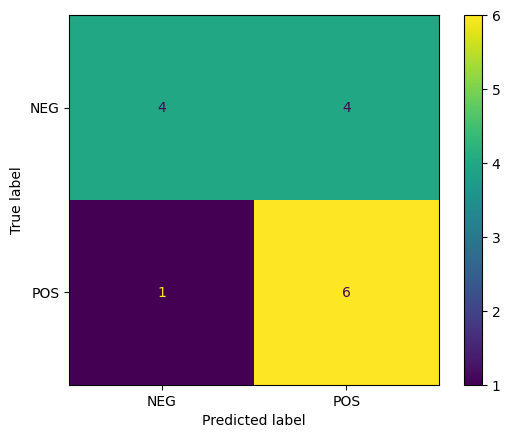

In [30]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model4, X_test, y_test)
plt.show()

In [44]:
# split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42) 

In [168]:
# model 3
#Import svm model
from sklearn import svm

#Create a svm Classifier
model3 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
model3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model3.predict(X_test)

In [169]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6944444444444444


/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


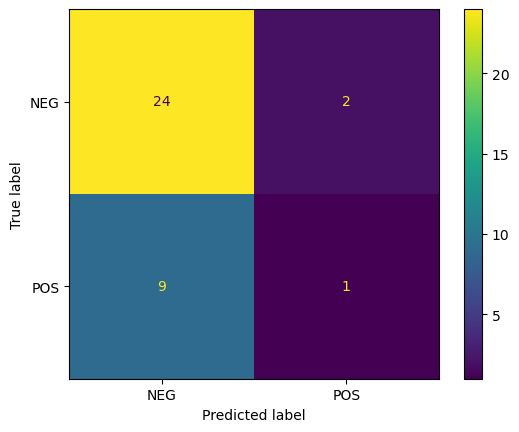

In [170]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model3, X_test, y_test)
plt.show()

In [77]:
# do clusttering
import matplotlib.pyplot as plt
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [79]:
kmeans = KMeans(
   init="random",
     n_clusters=2,
    n_init=10,
   max_iter=300,
  random_state=42)
   

In [80]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, random_state=42)

In [81]:
kmeans.n_iter_

9

In [82]:
kmeans.labels_[:5]

array([0, 0, 1, 1, 0], dtype=int32)

In [84]:
kmeans_silhouette = silhouette_score(
scaled_features, kmeans.labels_
   ).round(2)
kmeans_silhouette

0.3

In [108]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
dbscan.fit(scaled_features)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_ ).round (2)

In [109]:
dbscan.labels_

array([-1, -1, -1, -1,  2, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  1, -1,  1, -1,  0, -1, -1, -1,
       -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  2,
       -1, -1, -1,  1, -1,  0,  1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1,  2, -1, -1, -1, -1,  0,  1, -1, -1,  0,  1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1,  1,  2, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  0, -1,  1, -1,  1, -1, -1,  0, -1])

Text(0.5, 1.0, 'k-means\nSilhouette: 0.30000001192092896')

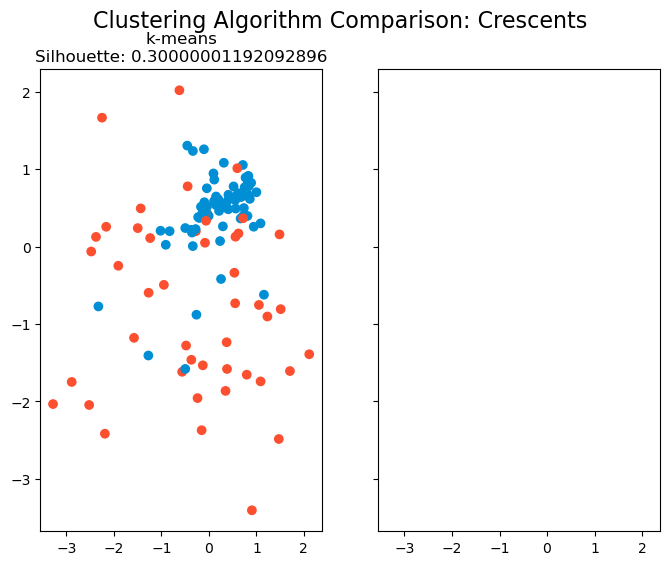

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6), sharex=True, sharey=True)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {0: "#008fd5",1: "#fc4f30"}
 # The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12})
# #The dbscan plot
# db_colors = [fte_colors[label] for label in dbscan.labels_]
# ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
# ax2.set_title( f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12})
# plt.show()


In [117]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

model2 = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3)

score = cross_val_score(model2, X_train, y_train,  scoring="accuracy")
model2.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, max_features=0.5, min_samples_leaf=3,
                       random_state=0)

In [118]:
print(f'Scores are: {score}')

Scores are: [0.70588235 0.76470588 0.82352941 0.75       0.75      ]


/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


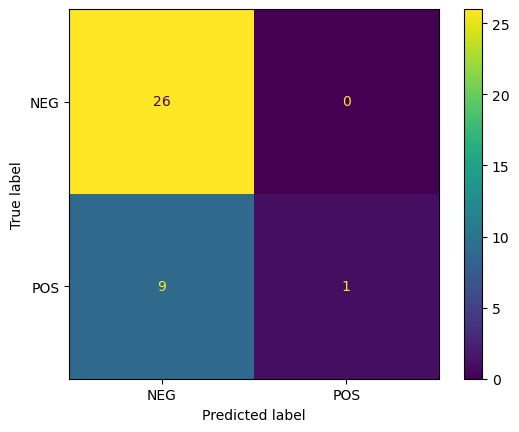

In [119]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, X_test, y_test)
plt.show()

In [120]:
pred2 = model2.predict(X_test)
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

         NEG       0.74      1.00      0.85        26
         POS       1.00      0.10      0.18        10

    accuracy                           0.75        36
   macro avg       0.87      0.55      0.52        36
weighted avg       0.81      0.75      0.67        36



/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


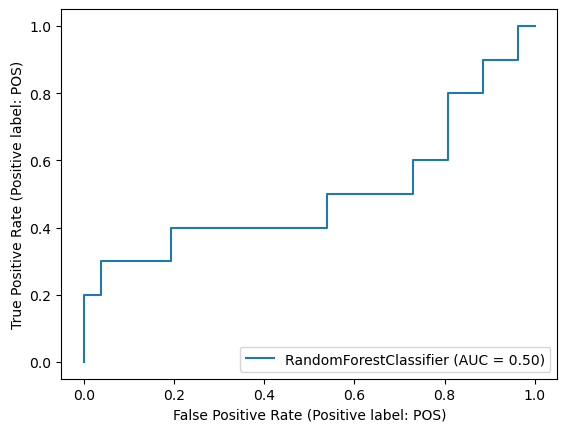

In [121]:
metrics.plot_roc_curve(model2, X_test, y_test)

In [176]:
# make predictions on the unknown
X_val = validation_df.iloc[:,:-1]

pred = model2.predict(X_val)

In [177]:
# get the prediction probabilities of the model data
val_proba = model2.predict_proba(X_val)
# val_proba

In [178]:
# get the prediction probabilities of the model data
val_proba = model2.predict_proba(X_val)
# val_proba

In [122]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_leaf':[3,5,7,10,15],'max_features':[0.5,'sqrt','log2'],
          'max_depth':[10,15,20],
          'class_weight':[{"POS":1,"NEG":1},{"POS":1,"NEG":2},{"POS":5,"NEG":1},'balanced'],
          'criterion':['entropy','gini']}


model1 = GridSearchCV(RandomForestClassifier(),param_grid, verbose=1,n_jobs=-1,scoring='roc_auc')
model1.fit(X_train,y_train)
print ('\n',model1.best_estimator_)
# # fit model
# model1 = RandomForestClassifier(random_state=42)

# model1.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits

 RandomForestClassifier(class_weight={'NEG': 2, 'POS': 1}, criterion='entropy',
                       max_depth=10, min_samples_leaf=3)


In [123]:
# make predictions
pred = model1.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         NEG       0.72      1.00      0.84        26
         POS       0.00      0.00      0.00        10

    accuracy                           0.72        36
   macro avg       0.36      0.50      0.42        36
weighted avg       0.52      0.72      0.61        36



/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/commons/conda/dsls/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


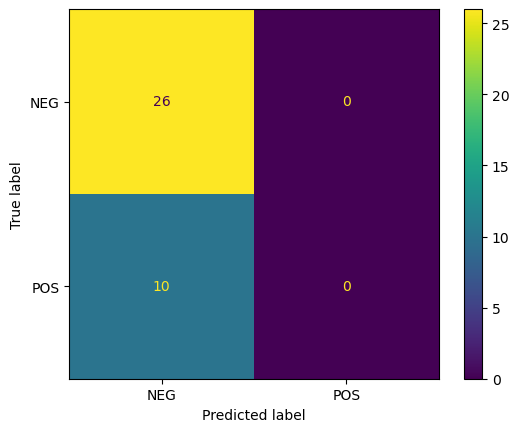

In [124]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model1, X_test, y_test)
plt.show()

/commons/conda/dsls/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


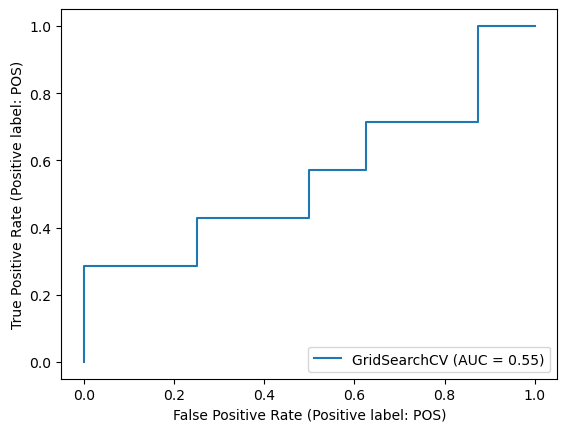

In [40]:
metrics.plot_roc_curve(model1, X_test, y_test)

In [40]:
# predicting the whole model data with the model
predictions = model1.predict(X)

In [41]:
# get the prediction probabilities of the model data
predict_proba = model1.predict_proba(X)
# predict_proba

In [42]:
# convert predictions and actual values to dataframe
predict_proba_df = pd.DataFrame(predict_proba, index=X.index,
                                columns=['NEG_prob', 'POS_prob'])
predict_proba_df['predictions'] = predictions
predict_proba_df['actual_values'] = model_df['set']
predict_proba_df

,NEG_prob,POS_prob,predictions,actual_values
TWMET_00170,0.47,0.53,POS,POS
TWMET_00012,0.19,0.81,POS,POS
TWMET_01157,0.17,0.83,POS,POS
TWMET_00848,0.24,0.76,POS,POS
TWMET_00037,0.88,0.12,NEG,POS
...,...,...,...,...
TWMET_00101,0.97,0.03,NEG,NEG
TWMET_00415,0.81,0.19,NEG,NEG
TWMET_01030,0.92,0.08,NEG,NEG
TWMET_00410,0.77,0.23,NEG,NEG


In [ ]:
# # get set of positive and negative concepts from the second layer data
# pos_second = set(second_layer[second_layer['subject'] == 'TWDIS_06685'].object)
# neg_second = set(second_layer[second_layer['subject'] ==  'TWDIS_09015'].object)
# print(neg_second)
# # label validation_df

# # mask = val_df[val_df.index.isin(pos_second)]

# # val_df.loc[mask, 'set'] = 'POS'
# val_df['set'].loc[val_df.index.isin (pos_second)] = 'POS'


: 

In [ ]:
#val_df['set'].loc[val_df.index.isin (neg_second)] = 'NEG'

: 

In [43]:
# make predictions on the unknown
X_val = val_df.iloc[:,:-1]

pred = model1.predict(X_val)


In [44]:
# get the prediction probabilities of the model data
val_proba = model1.predict_proba(X_val)
# val_proba

In [45]:
# convert predictions and actual values to dataframe
val_proba_df = pd.DataFrame(val_proba, index=X_val.index,
                                columns=['NEG_prob', 'POS_prob'])
val_proba_df['predictions'] = pred
val_proba_df = val_proba_df.sort_values('POS_prob', ascending=False)
val_proba_df

,NEG_prob,POS_prob,predictions
TWMET_00453,0.29,0.71,POS
TWMET_00492,0.29,0.71,POS
TWMET_00176,0.31,0.69,POS
TWMET_00764,0.31,0.69,POS
TWMET_00254,0.31,0.69,POS
...,...,...,...
TWMET_00706,1.00,0.00,NEG
TWMET_00751,1.00,0.00,NEG
TWMET_00824,1.00,0.00,NEG
TWMET_00852,1.00,0.00,NEG


In [49]:
len(val_proba_df[val_proba_df.predictions == 'POS'])

24

In [46]:
import requests
session = requests.Session()
base_url = 'https://apimlqv2.tenwiseservice.nl/api/mlquery/'
session.headers['referer'] = 'https://apimlqv2.tenwiseservice.nl'
session.get(f"{base_url}start/")

payload = {'apikey': '',
           'csrfmiddlewaretoken': session.cookies.get_dict()['csrftoken']}

# annotate predictions
ids = list(val_proba_df.index)
payload['concept_ids'] = ",".join(ids)
results = session.post(f"{base_url}conceptset/annotation/", payload)
js = results.json()
annotation = js['result']['annotation']
# get ids
annotated_ids = []
for id in ids:
    annotated_ids.extend(annotation[id]['name'])
# add ids to the dataframe
val_proba_df['annotation'] = annotated_ids
val_proba_df.head(10)

,NEG_prob,POS_prob,predictions,annotation
TWMET_00453,0.29,0.71,POS,isocitrate
TWMET_00492,0.29,0.71,POS,oxaloacetate
TWMET_00176,0.31,0.69,POS,n-acetylcysteine
TWMET_00764,0.31,0.69,POS,5-hydroxyindole-3-acetic acid
TWMET_00254,0.31,0.69,POS,NADP
TWMET_00529,0.32,0.68,POS,semialdehyde
TWMET_00067,0.33,0.67,POS,morphine
TWMET_01225,0.35,0.65,POS,valproic acid
TWMET_01208,0.35,0.65,POS,tocopherol acetate
TWMET_00436,0.35,0.65,POS,glyoxylate


In [106]:
metabs = val_proba_df[['POS_prob', 'annotation']].head(10)
pd.DataFrame.to_csv(metabs, '/homes/fabadmus/Internship/result1.tsv', sep='\t') 

Choosing second Second_layer 

In [11]:
full_second_layer = pd.read_csv('/homes/fabadmus/Internship/test_file')
full_second_layer.head()

,Unnamed: 0,subject,predicate,object,overlap,score,local_mi
0,0,TWMET_00001,REL_9999,TWMET_00001,535243,47,25156421
1,1,TWMET_00001,REL_9999,TWMET_00002,63340,5,316700
2,2,TWMET_00001,REL_9999,TWMET_00003,42063,7,294441
3,3,TWMET_00001,REL_9999,TWMET_00004,33413,6,200478
4,4,TWMET_00001,REL_9999,TWMET_00005,3694,1,3694


In [12]:
full_second_layer = full_second_layer[['subject', 'object', 'score', 'overlap','local_mi']]
full_second_layer = full_second_layer[full_second_layer['score'] >= 1]
full_second_layer= full_second_layer[full_second_layer['overlap'] >= 100].reset_index(drop=True)
full_second_layer= full_second_layer.drop(columns = ['score', 'overlap'])
# full_second_layer.sort_values('local_mi', ascending=False, inplace=True)
# filter out self loops
full_second_layer= full_second_layer[full_second_layer['subject'] != full_second_layer['object']]
# remove duplicates since relations always goes both ways
full_second_layer = full_second_layer.iloc[::2]



,subject,object,local_mi
1,TWMET_00001,TWMET_00002,316700
3,TWMET_00001,TWMET_00004,200478
5,TWMET_00001,TWMET_00006,5351
7,TWMET_00001,TWMET_00008,2826
9,TWMET_00001,TWMET_00010,28920
...,...,...,...
35760,TWMET_01233,TWMET_01140,321
35762,TWMET_01233,TWMET_01152,143
35764,TWMET_01233,TWMET_01154,342
35766,TWMET_01233,TWMET_01174,351


In [13]:
# get relations with the highest local_mi
full_second_layer= full_second_layer.groupby(['subject'])[['object', 'local_mi']].max().reset_index()
full_second_layer

,subject,object,local_mi
0,TWMET_00001,TWMET_01233,316700
1,TWMET_00002,TWMET_01232,1859958
2,TWMET_00003,TWMET_01232,294441
3,TWMET_00004,TWMET_01232,1188188
4,TWMET_00005,TWMET_01232,509775
...,...,...,...
691,TWMET_01227,TWMET_01116,169824
692,TWMET_01228,TWMET_01004,249064
693,TWMET_01229,TWMET_00585,926694
694,TWMET_01232,TWMET_01233,202575


In [80]:
from heapq import nlargest
full_second_layer = full_second_layer[full_second_layer.subject.str.startswith('TWDIS') == False].reset_index()

# full_second_layer.sort_values(['object', 'local_mi'],ascending=False).groupby(['subject']).head(3)

In [82]:
full_second_layer.groupby(['subject', 'object'])[['local_mi']].max()

local_mi
subject     object               
TWMET_00001 TWMET_00002    316700
            TWMET_00003    294441
            TWMET_00004    200478
            TWMET_00005      3694
            TWMET_00006      5351
...                           ...
TWMET_01233 TWMET_01173       309
            TWMET_01174       351
            TWMET_01202       400
            TWMET_01230      5461
            TWMET_01232      3198

[11842 rows x 1 columns]

In [121]:
# full_second_layer.groupby(['subject'])[['object', 'local_mi']].nlargest(2)
full_second_layer.groupby(['subject']).apply(lambda x: x.sort_values(['local_mi'], ascending = False)[:2])

index  Unnamed: 0      subject       object  local_mi
subject                                                                
TWMET_00001 143     262         262  TWMET_00001  TWMET_00011    584080
            174     293         293  TWMET_00001  TWMET_00411    466026
TWMET_00003 18      137         137  TWMET_00003  TWMET_00011   4352940
            38      157         157  TWMET_00003  TWMET_00002   1859958
TWMET_00005 158     277         277  TWMET_00005  TWMET_00026    531144
...                 ...         ...          ...          ...       ...
TWMET_01153 193     312         312  TWMET_01153  TWMET_00844    432150
TWMET_01157 738     857         857  TWMET_01157  TWMET_00194     61875
            771     890         890  TWMET_01157  TWMET_00555     57750
TWMET_01233 949    1068        1068  TWMET_01233  TWMET_00092     41488
            1172   1291        1291  TWMET_01233  TWMET_00369     27970

[238 rows x 5 columns]